# bdt_Hackathon

## Importing

### Importing Libraries

In [1472]:
# Getting the necessary libraries and data

# General libraries
import pandas as pd
import numpy as np
import time

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks,RandomUnderSampler,NearMiss 
from sklearn.metrics import roc_auc_score, confusion_matrix,plot_confusion_matrix,cohen_kappa_score,accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.feature_selection import RFE

### Importing Dataset

In [1489]:
particles_original = pd.read_csv("particles.csv")
particles = particles_original.copy()

## Exploratory analysis

In [1474]:
particles.head()

,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise,Particle
0,NaN,-59.730861,396.928619,9.761703,-137.558889,159.598109,-137.558889,53.930955,154.713810,-232.436087,99.243140,3
1,147.781782,153.729532,111.998962,-174.941235,-97.888332,26.493593,-97.888332,-30.506871,-166.347802,-195.010710,20.242743,0
2,242.220616,82.947635,-102.073856,116.334349,-101.746729,176.452824,-101.746729,-33.419984,44.082548,-173.928682,3.806943,1
3,140.542085,-110.129037,215.560355,-11.927860,-11.257902,21.648833,-11.257902,240.685681,133.441269,-276.382025,0.336025,0
4,169.367809,-92.182925,159.995515,-272.230740,-80.483153,-97.698901,-80.483153,16.251613,-13.177148,-100.316959,24.459551,0


In [1475]:
particles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127321 entries, 0 to 127320
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha_1   109132 non-null  float64
 1   alpha_2   127321 non-null  float64
 2   alpha_3   127321 non-null  float64
 3   beta_1    127321 non-null  float64
 4   beta_2    127131 non-null  float64
 5   beta_3    127206 non-null  float64
 6   gamma_1   127321 non-null  float64
 7   gamma_2   126594 non-null  float64
 8   gamma_3   117897 non-null  float64
 9   theta     126595 non-null  float64
 10  noise     127321 non-null  float64
 11  Particle  127321 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 11.7 MB


In [1476]:
particles.describe()

,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise,Particle
count,109132.000000,127321.000000,127321.000000,127321.000000,127131.000000,127206.000000,127321.000000,126594.000000,117897.000000,126595.000000,127321.000000,127321.000000
mean,-10.713873,-0.270224,49.546923,7.508049,46.853638,0.451485,46.845556,-0.040888,-20.881407,-61.594057,50.126020,1.647804
std,152.987128,100.044696,221.503776,164.993428,160.134335,99.979061,160.142626,99.797656,160.637008,146.954921,28.848755,1.470649
min,-779.841923,-391.102365,-1263.945127,-701.930722,-655.626984,-448.118855,-655.626984,-435.684650,-719.937495,-653.437102,0.000390,0.000000
25%,-118.765902,-68.036224,-102.428650,-109.328232,-59.311413,-66.838936,-59.320379,-67.011881,-133.157334,-158.912087,25.125602,0.000000
50%,-0.787086,-0.112444,48.483502,6.053932,55.785954,0.571383,55.772838,-0.265758,-14.309868,-75.169482,50.213148,2.000000
75%,101.815933,66.895676,198.157415,123.154096,155.939039,67.675433,155.939228,66.893239,95.426099,20.771011,75.115084,2.000000
max,698.044837,444.209708,1383.265329,666.078562,726.063419,448.925730,726.063419,544.546234,682.413287,689.548943,99.993348,7.000000


In [1477]:
# Checking for target unbalance
particles['Particle'].value_counts()

2    42060
0    32197
1    27340
3    17727
7     2854
5     2269
4     1704
6     1170
Name: Particle, dtype: int64

In [1478]:
# Checking for nulls proportion
len(particles.dropna())/len(particles)

0.769315352534146

In [1479]:
# Checking for nulls proportion in each column 
particles.isna().sum()/len(particles)

alpha_1     0.142859
alpha_2     0.000000
alpha_3     0.000000
beta_1      0.000000
beta_2      0.001492
beta_3      0.000903
gamma_1     0.000000
gamma_2     0.005710
gamma_3     0.074018
theta       0.005702
noise       0.000000
Particle    0.000000
dtype: float64

In [1480]:
# Checking for nulls proportion for the different target classes and columns

particle_names = ["Leptons","Quarks","Gluons","Electroweak bosons","Graviton","Higgs boson","Antileptons","Antiquarks"]


for i in range(len(particles['Particle'].value_counts())):
    print("Proportion of nulls for particle type",i,"(",particle_names[i],") :\n")
    print(particles.loc[particles['Particle']== i].isna().sum()/len(particles.loc[particles['Particle']== i]),"\n")
    

Proportion of nulls for particle type 0 ( Leptons ) :

alpha_1     0.143492
alpha_2     0.000000
alpha_3     0.000000
beta_1      0.000000
beta_2      0.001522
beta_3      0.000808
gamma_1     0.000000
gamma_2     0.005311
gamma_3     0.071559
theta       0.005404
noise       0.000000
Particle    0.000000
dtype: float64 

Proportion of nulls for particle type 1 ( Quarks ) :

alpha_1     0.141368
alpha_2     0.000000
alpha_3     0.000000
beta_1      0.000000
beta_2      0.001390
beta_3      0.000951
gamma_1     0.000000
gamma_2     0.005743
gamma_3     0.075091
theta       0.006328
noise       0.000000
Particle    0.000000
dtype: float64 

Proportion of nulls for particle type 2 ( Gluons ) :

alpha_1     0.141583
alpha_2     0.000000
alpha_3     0.000000
beta_1      0.000000
beta_2      0.001545
beta_3      0.000975
gamma_1     0.000000
gamma_2     0.006182
gamma_3     0.074275
theta       0.005563
noise       0.000000
Particle    0.000000
dtype: float64 

Proportion of nulls for partic

### Collinearity between predictive features

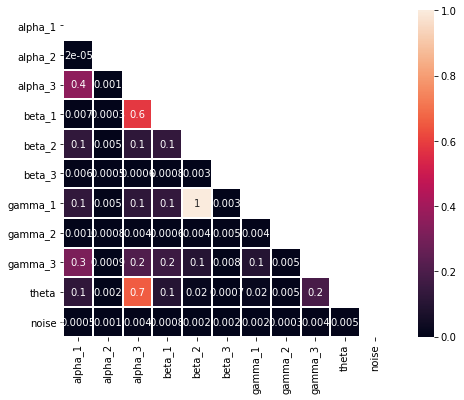

In [1481]:
# Here I spotted 2 columns that provide the same information ( gamma_1 and beta_2)
mask = np.zeros_like(particles.drop(columns= 'Particle').corr().abs())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(particles.drop(columns= 'Particle').corr().abs(), mask=mask,
                square=True, annot=True, linewidths=1,
                vmax = 1, vmin = 0, fmt='.1g')

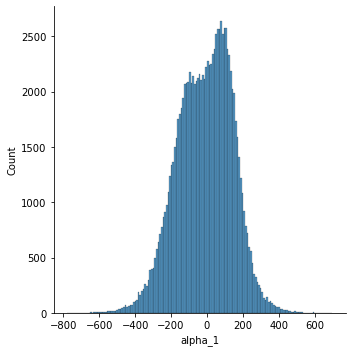

Skewness for alpha_1 :  -0.21590369429736203


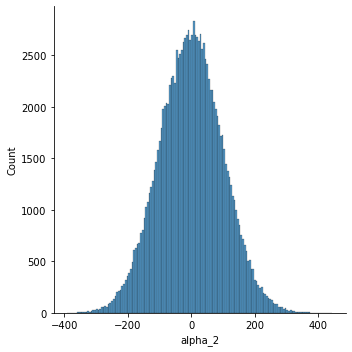

Skewness for alpha_2 :  0.015081396078043563


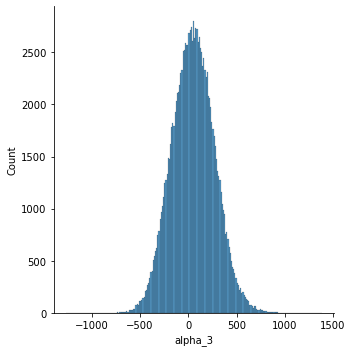

Skewness for alpha_3 :  0.08274360138362968


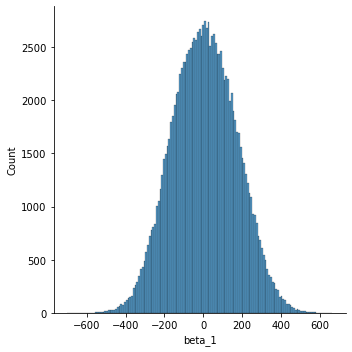

Skewness for beta_1 :  0.03807770832507853


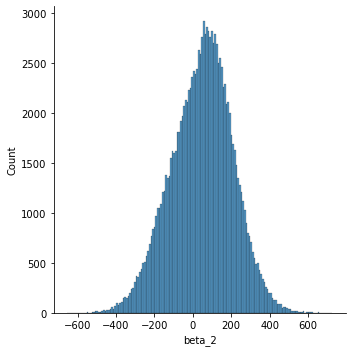

Skewness for beta_2 :  -0.15727871923940415


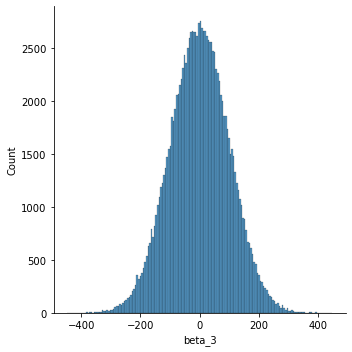

Skewness for beta_3 :  -0.008260749167808171


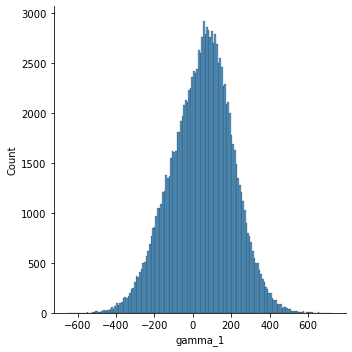

Skewness for gamma_1 :  -0.1571514074391445


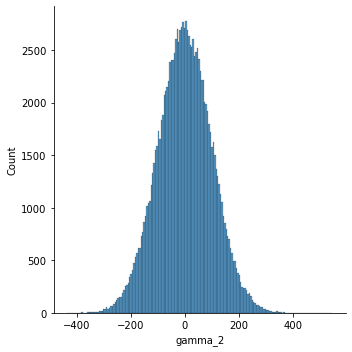

Skewness for gamma_2 :  0.0032081621586187437


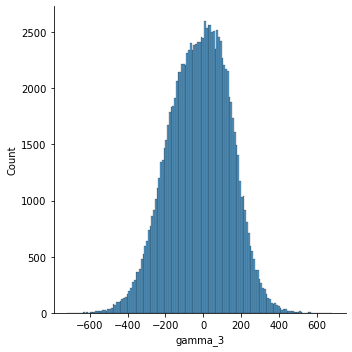

Skewness for gamma_3 :  -0.14860218771173667


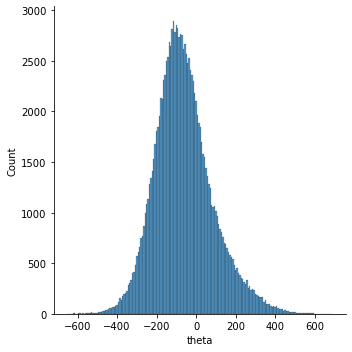

Skewness for theta :  0.5192588723985619


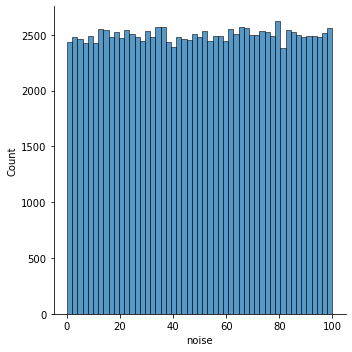

Skewness for noise :  -0.004598609418940593


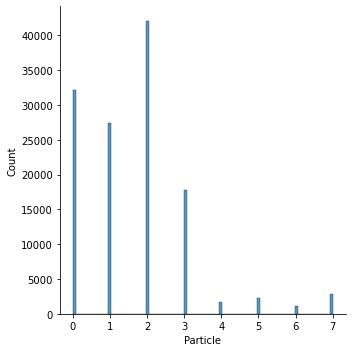

Skewness for Particle :  1.3232023926446548


In [1482]:
# Taking a look at the distributions of each feature
for col in particles.columns: 
    sns.displot(particles[col])
    skewnes = particles[col].skew()
    plt.show()
    print("Skewness for "+col+" : ", skewnes ) 

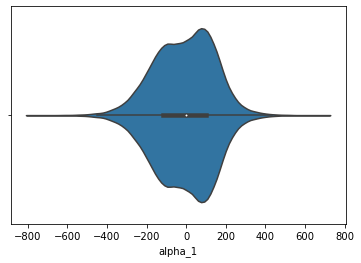

1st Quartile:  -118.765901975  3rd Quartile:  101.815933175


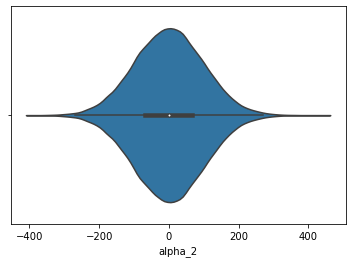

1st Quartile:  -68.03622374  3rd Quartile:  66.89567638


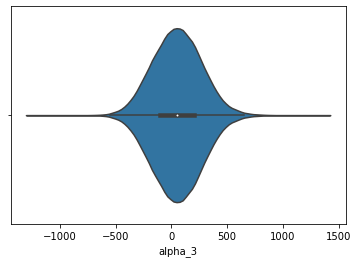

1st Quartile:  -102.4286495  3rd Quartile:  198.1574149


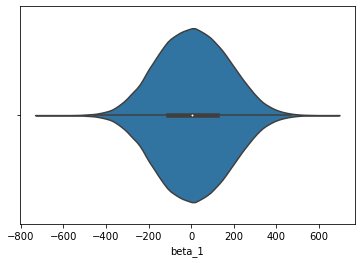

1st Quartile:  -109.3282317  3rd Quartile:  123.1540958


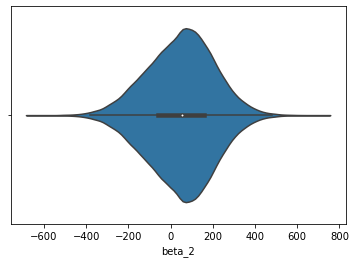

1st Quartile:  -59.311412634999996  3rd Quartile:  155.939039


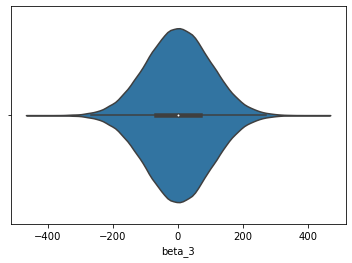

1st Quartile:  -66.838936395  3rd Quartile:  67.6754332


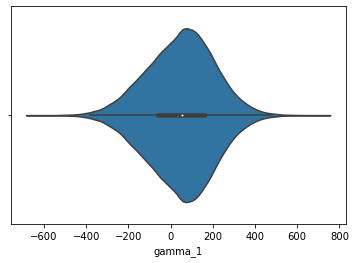

1st Quartile:  -59.32037932  3rd Quartile:  155.939228


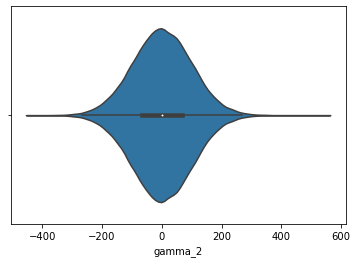

1st Quartile:  -67.0118809725  3rd Quartile:  66.89323882000001


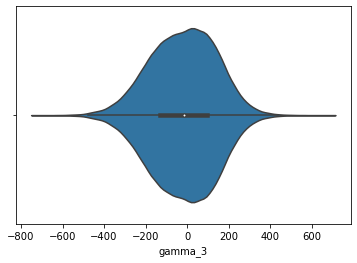

1st Quartile:  -133.1573345  3rd Quartile:  95.42609933


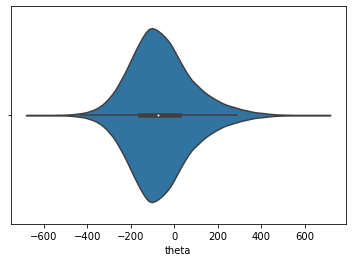

1st Quartile:  -158.9120866  3rd Quartile:  20.77101136


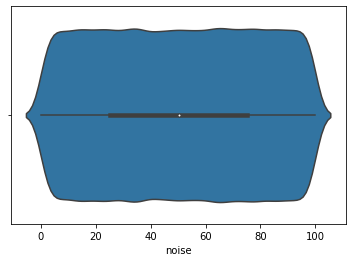

1st Quartile:  25.12560166  3rd Quartile:  75.11508409999999


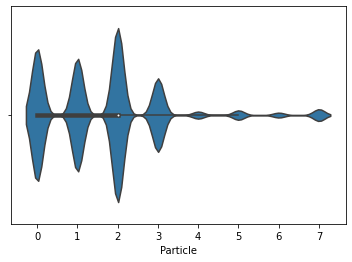

1st Quartile:  0.0  3rd Quartile:  2.0


In [691]:
# Looking for outliers 
for col in particles.columns: 
    sns.violinplot(x = particles[col])
    
    Q1 = particles[col].quantile(0.25)
    Q3 = particles[col].quantile(0.75)
    #Calculating Quartiles of that column
    
    plt.show()
    print("1st Quartile: ", Q1, " 3rd Quartile: ", Q3)

## Data Cleaning

### Dropping columns

In [1490]:
# we will drop colum beta_2 because it provides exactly the same information as gamma_1 

particles = particles.drop(columns = 'beta_2')

### Dealing with missing values

In [1491]:
# Dropping all the rows with missing values within the 3 majority classes : 

particles = particles.drop(particles.loc[ (particles['Particle']>=0) & (particles['Particle']<=3) & (particles.isna().any(axis=1))].index)

In [1492]:
# Replacing the missing values of all the minority classes with the mean of the value in it's own particle class

for i in range(4,8,1):
    for column in particles.drop(columns= 'Particle').columns:
        particles.loc[particles['Particle']==i, column] = particles.loc[particles['Particle']==i,column].fillna(particles.loc[particles['Particle']==i,column].median())

### Changing distribution

In [1493]:
# changing the distribution of the column 'noise' (proved to improve model performance)

particles.noise = np.log(particles.noise)

## Modeling

### Defining user functions

In [1447]:
def Score_Analisis(classification, X_test, y_test): #Function to evaluate a single model
    
    predictions = classification.predict(X_test) 
    print("Accuracy score: %4.3f " % accuracy_score(y_test, predictions))
   
    print("F1-score : %4.3f" % (f1_score(y_test,predictions,average = 'macro')))
    
    plot_confusion_matrix(classification, X_test, y_test) 
    plt.show()

In [ ]:
def evaluating_models(models, X_train, y_train, X_test, y_test): # Function to evaluate multiple models
    """
    Input: Models to test , train and test sets
    Output: DF with the performance of all the models
    """
    # first batch of empty lists    
    time_to_train = []
    model_names = []
    accuracy = []
    macro_F1 = []
    report_dict = []

    for model in models: 
        
        model_name = type(model).__name__
        
        try:
            model_name += " " + str(model.estimator)
            
        except AttributeError:
            pass
        
        model_names.append(model_name)
        
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # metrics
        accuracy_ = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")

        # appending to empty lists
        time_to_train.append(str(round(time.time() - start,3))+" Seconds")
        accuracy.append(round(accuracy_,3))
        macro_F1.append(round(f1,3))
        
  
    # creating DF
    best_models_DF = pd.DataFrame({"Model":model_names,
                                   "Training time":time_to_train,
                                   "Accuracy":accuracy,
                                   "F1_macro":macro_F1
                                  })
    
  
    
    return best_models_DF.sort_values(by=["F1_macro"], ascending=False).reset_index(drop=True)

### Data preprocessing

In [1494]:
### defining X and y 
X = particles.drop(columns = 'Particle')
y = particles['Particle']

In [1495]:
#train test split : (using stratify parameter in order to have equally distributed target class types on train and test sets)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123, stratify = y) 

#Scaling the data (I didn't spot any important outliers so I will proceed with StandardScaler)
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Dealing with target class unbalance

In [1496]:
# Using tomekLinks to remove the most ambiguous rows from the majority classes

tl = TomekLinks(sampling_strategy = [0,1,2,3])

X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)

print("Rows removed per label (Tomek-links): ")
print(y_train.value_counts() - y_train_tl.value_counts(),"\n\n")

# Using RandomUnderSampler to remove more rows from the majority classes

sample_n = y_train_tl.value_counts().iloc[4] *2  # I took as threshold the most populated minority class multiplied by 2 

r_undersample = RandomUnderSampler(sampling_strategy = {0:sample_n,1:sample_n,2:sample_n,3:sample_n})
X_train_ran, y_train_ran = r_undersample.fit_resample(X_train_tl, y_train_tl)

print("Rows removed per label (RandomUndersampler): ")
print(y_train.value_counts() - y_train_ran.value_counts(),"\n\n")


Rows removed per label (Tomek-links): 
2    3163
0    2277
1    3011
3    1967
7       0
5       0
4       0
6       0
Name: Particle, dtype: int64 


Rows removed per label (RandomUndersampler): 
0    17274
1    13821
2    24063
3     7098
4        0
5        0
6        0
7        0
Name: Particle, dtype: int64 




### Evaluating different models

In [1468]:
# Initializing the different models

neigh = KNeighborsClassifier()

# Ensemble methods
gradient = GradientBoostingClassifier()
RF = RandomForestClassifier(class_weight = "balanced")

# OvA methods
ova_log = OneVsRestClassifier(LogisticRegression())
ova_sgd = OneVsRestClassifier(SGDClassifier())
ova_pa = OneVsRestClassifier(PassiveAggressiveClassifier())
ova_per = OneVsRestClassifier(Perceptron())
ova_ridg = OneVsRestClassifier(RidgeClassifier())
ova_svc = OneVsRestClassifier(SVC())
# OvO methods

ovo_log = OneVsOneClassifier(LogisticRegression())
ovo_sgd = OneVsOneClassifier(SGDClassifier())
ovo_pa = OneVsOneClassifier(PassiveAggressiveClassifier())
ovo_per = OneVsOneClassifier(Perceptron())
ovo_ridg = OneVsOneClassifier(RidgeClassifier())
ovo_svc = OneVsOneClassifier(SVC())

# Storing all the models in a list
models = [neigh, gradient, RF, ova_log, ova_sgd, ova_pa, ova_per, ova_ridg, ova_svc, ovo_log, ovo_sgd, ovo_pa, ovo_ridg, ovo_svc]


In [1457]:
# Evaluating all the models stored with my designed function
df = evaluating_models(models, X_train_ran, y_train_ran, X_test_scaled, y_test)

In [1458]:
# We can see that the top performer is RandomForest with a macro of almost 0.6, followed by GradientBoosting and SVC()
df

,Model,Training time,Accuracy,F1_macro
0,RandomForestClassifier,6.974 Seconds,0.768,0.596
1,GradientBoostingClassifier,59.205 Seconds,0.711,0.563
2,OneVsOneClassifier SVC(),33.254 Seconds,0.737,0.516
3,OneVsRestClassifier SVC(),60.249 Seconds,0.723,0.491
4,KNeighborsClassifier,1.511 Seconds,0.679,0.460
5,OneVsOneClassifier LogisticRegression(),0.289 Seconds,0.523,0.336
6,OneVsOneClassifier SGDClassifier(),0.52 Seconds,0.525,0.334
7,OneVsOneClassifier RidgeClassifier(),0.097 Seconds,0.524,0.330
8,OneVsRestClassifier LogisticRegression(),0.2 Seconds,0.510,0.312
9,OneVsRestClassifier RidgeClassifier(),0.074 Seconds,0.512,0.274


### Hyperparameter tuning on KneighborsClassifier

In [1469]:
# Giving a second chance to Kneighbors this time with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# define grid search
neigh_search = GridSearchCV(estimator = KNeighborsClassifier(),
                            param_grid = {"n_neighbors": list(range(4,15,1)),
                                         "weights":["uniform", "distance"],
                                         "p":[1,2]},
                            scoring="f1_macro",
                            cv=3)

In [1287]:
neigh_search.fit(X_train_ran, y_train_ran)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1_macro')

Accuracy score: 0.71 
F1-score : 0.49


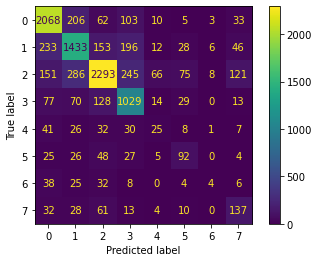

In [1288]:
# The results improved, but not better than other models

Score_Analisis(neigh_search,X_test_scaled,y_test)

### Best model so far (RandomForestClassifier) :

In [1351]:
# Running recursive feature estimator with my best model so far ( RandomForest ) 

start = time.time()

selector = RFE(RandomForestClassifier(class_weight = "balanced"), n_features_to_select=1)
selector = selector.fit(X, y)

print(start-time.time())

# After evaluating the model without the least important columns I could witness that it didn't help the model performance
# so I will not drop any more column

-209.48702120780945


In [1355]:
selector.ranking_

array([ 1, 10,  6,  5,  9,  3,  7,  2,  4,  8])

Accuracy score: 0.766 
F1-score : 0.594


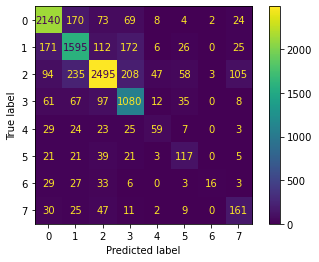

In [1497]:
# Evaluating the model adding Confusion Matrix
RF = RandomForestClassifier(class_weight = "balanced").fit(X_train_ran, y_train_ran)

Score_Analisis(RF,X_test_scaled,y_test)